# Prerequisites


In [109]:
library(tidyverse)
library(gridExtra)
library(ggrepel)
library(maps)

# Visualizing Data

Core feature of exploratory data analysis is asking questions about data and searching for answers by visualizing and modeling data. Most questions around what type of variation or covariation occurs between variables.

Base R comes with some functions to visualize your data -- base R plots might look something like this:

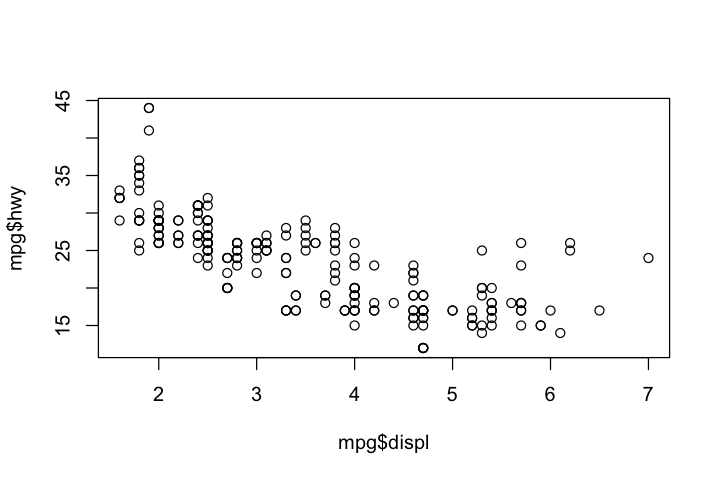

In [110]:
options(repr.plot.width=6, repr.plot.height=4)
# regular plot functions in R
plot(x=mpg$displ,y=mpg$hwy)

You can also use ggplot2 for your visualizations -- here's an example of default parameters in ggplot2:

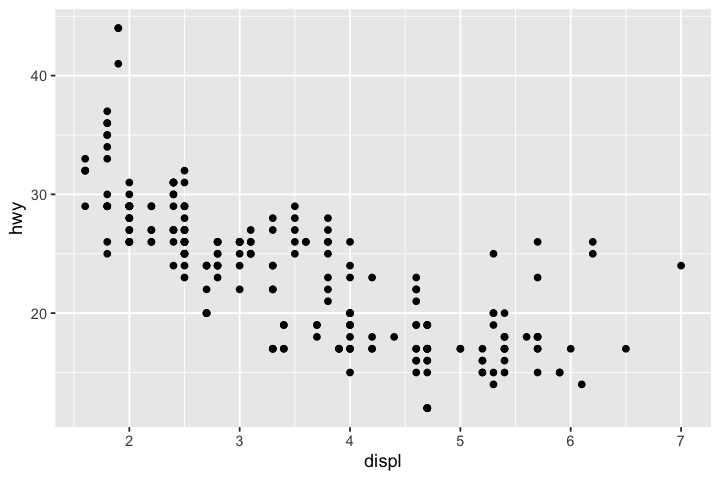

In [111]:
# ggplot!
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy))

You can also make publication-quality visualizations using ggplot2:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



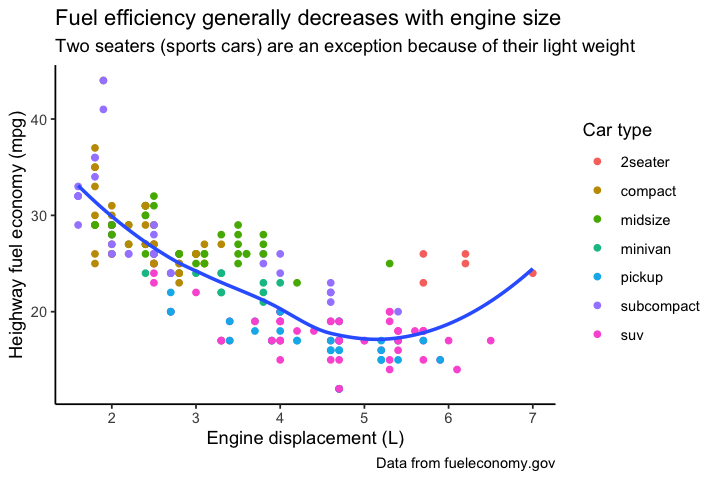

In [112]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + theme_classic()

# Visualizing Data

All plots in ggplot follow the same syntax:

```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

Let's use the `head()` function to look at the data we plotted in the above examples:

In [113]:
head(mpg) # automatically loaded when you load tidyverse

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Let's break down the components of ggplot. First, note that `ggplot(data=<DATA>)` on its own will not actually plot anything.

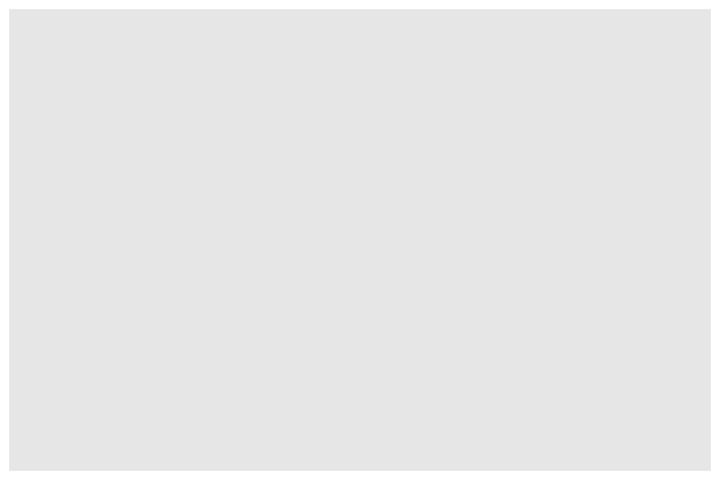

In [114]:
ggplot(mpg)

This is because we need the `<GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)` to tell us what exactly to plot using our data. However, just `ggplot(data=<DATA>) + <GEOM_FUNCTION>()` on its own doesn't do anything either.

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x and y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default

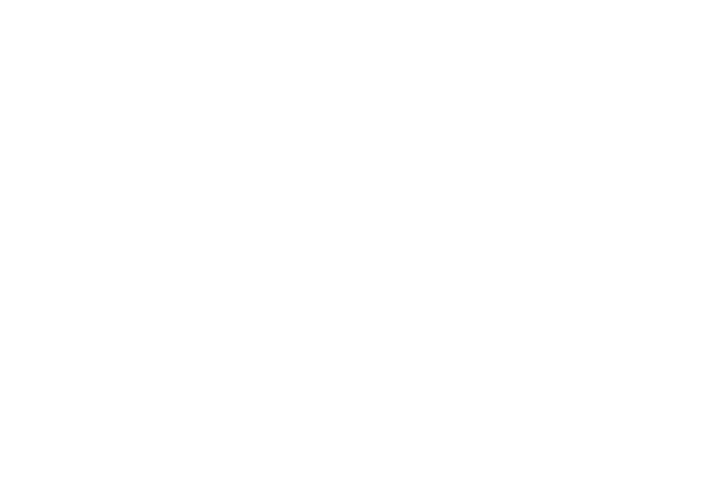

In [115]:
ggplot(mpg) + geom_point()

So in fact we need *all* of the components described in the ggplot syntax.

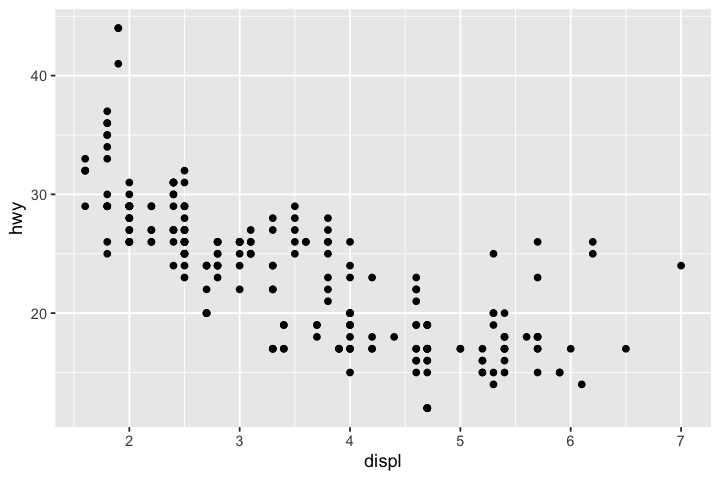

In [116]:
ggplot(mpg) + geom_point(mapping=aes(x=displ,y=hwy))

## `<MAPPINGS>`

```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

Mappings refer to the visual properties of objects in the plot, i.e. size, shape, color. Can display points from other variables (in this case class) in different ways by changing value of aesthetic properties. These are known as **levels**, which is done in order to distinguish aesthetic values from data values.

In [117]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Let's try using `geom_point` to make some scatter plots and we can modify the mappings to change how we represent the `class` categories.  

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”
Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”


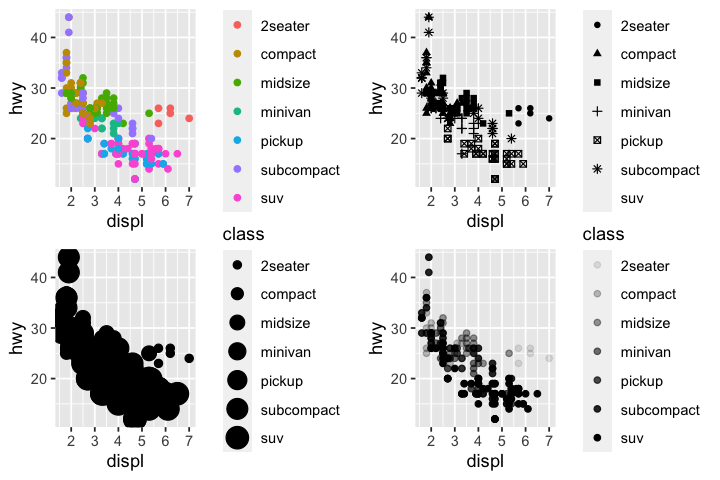

In [118]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=class))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=class))
p3 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,size=class))
p4 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,alpha=class))
grid.arrange(p1,p2,p3,p4,nrow=2)

So, we can represent the `class` data as the `color`, `shape`, `size`, or `alpha` (transparency scales). As you can see, not all mappings lend themselves to all data -- there's only 6 `shape` options available (we would need 7) and `alpha` and `size` aren't recommended for discrete data.

### Levels

**ggplot2** automatically assigns a unique level of an aesthetic to a unique value of the variable. This process is known as scaling. It will also automatically select a scale to use with the aesthetic (i.e. continuous or discrete) as well as add a legend explaining the mapping between levels and values. That's why in the size mapping there's no shape for suv, and why the following two pieces of code do different things:

For color property, all data points were assigned to 'blue', therefore ggplot2 assigns a single level to all of the points, which is red

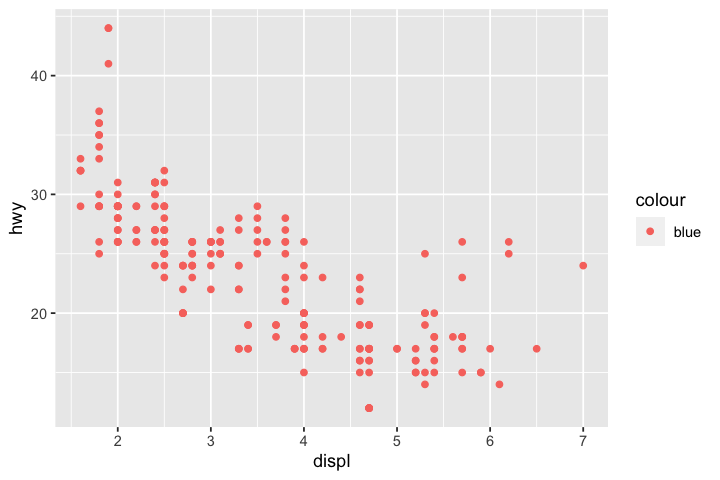

In [119]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color='blue'))

Here, color is placed outside aesthetic mapping, so ggplot2 understands that we want color of points to be blue

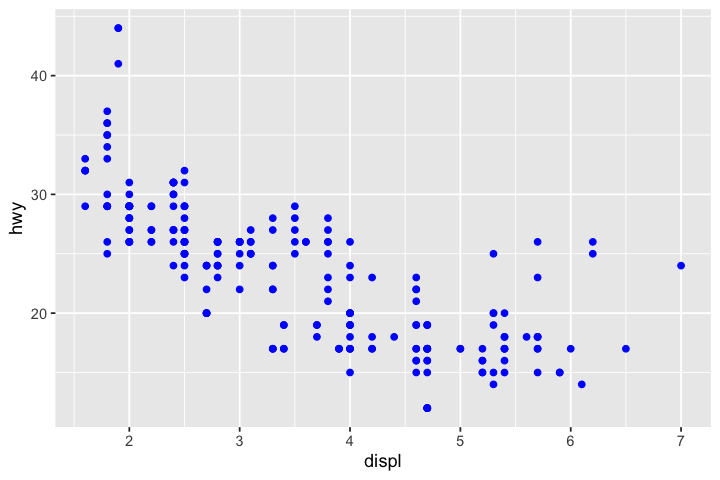

In [120]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy),color='blue')

`cty` is a continuous variable, so when mapped to color we get a gradient with bins instead

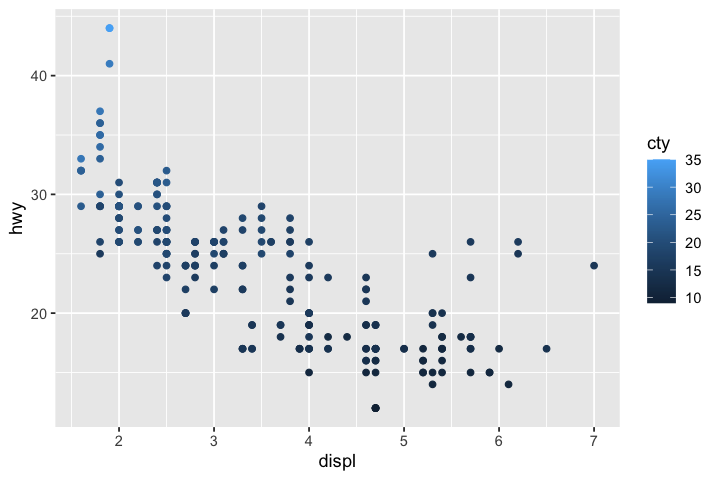

In [121]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=cty))

### Continuous vs discrete scales

Generally continuous scales get chosen for numerical data and discrete scales are chosen for categorical data. If your data is numeric but in discrete categories you may have to use `as.factor()` in order to get proper levels.

If we try to map `cyl` to `shape` we get an error because `shape` is only for discrete variables even though we only have `cyl`=4,5,6 or 8

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

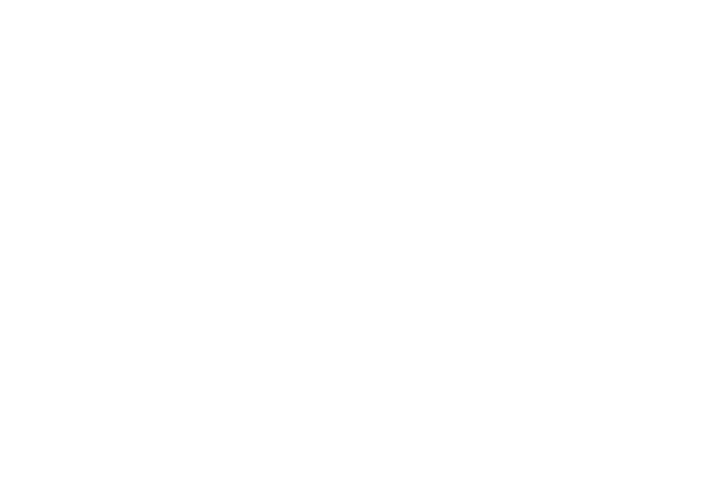

In [122]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=cyl))

We can transform `cyl` into categorical variable with levels using the `as.factor` function:

In [123]:
as.factor(mpg$cyl)

[1] 4 4 4 4 6 6 6 4 4 4 4 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 6 6 6
 [38] 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 [75] 8 8 8 6 6 6 6 8 8 6 6 8 8 8 8 8 6 6 6 6 8 8 8 8 8 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 6 6 6 4 4 4 4 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 6 6 8 8 4 4 4 4 6 6 6
[149] 6 6 6 6 6 8 6 6 6 6 8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 8 4 4 4 4 6 6
[186] 6 4 4 4 4 6 6 6 4 4 4 4 4 8 8 4 4 4 6 6 6 6 4 4 4 4 6 4 4 4 4 4 5 5 6 6 4
[223] 4 4 4 5 5 4 4 4 4 6 6 6
Levels: 4 5 6 8

Now we can try plotting again:

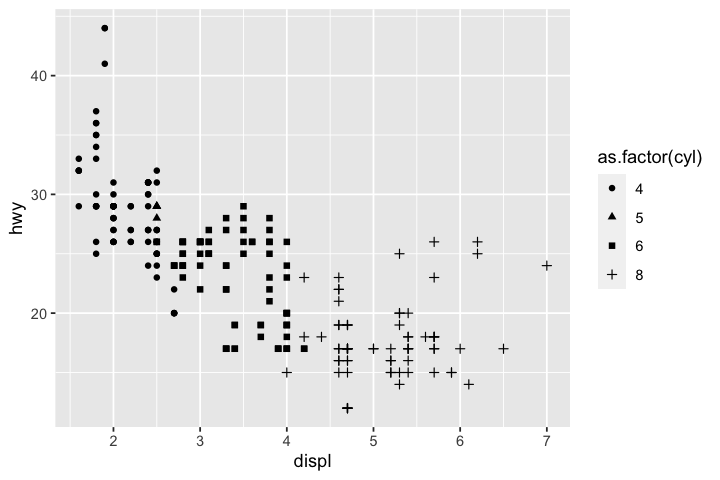

In [124]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=as.factor(cyl)))

Note that this means x and y are aesthetic mappings as well. In fact without them you will get an error.

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x and y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default

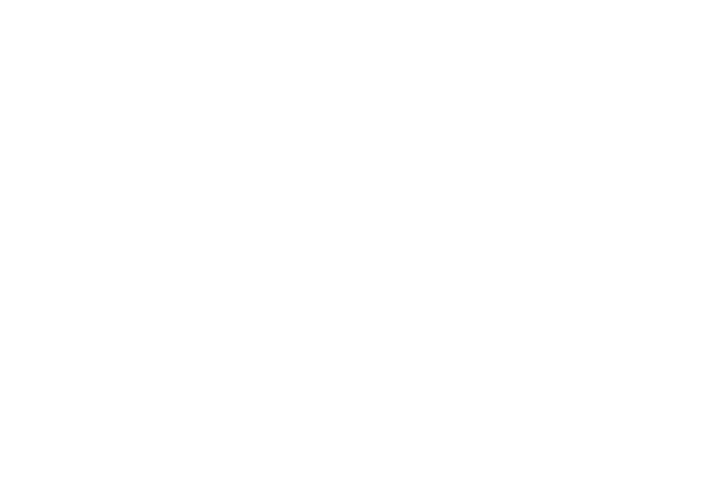

In [125]:
ggplot(data=mpg) + geom_point()

## `<GEOM_FUNCTION>`

```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

**geom** is geometrical object that the plot uses to represent data. Bar charts use bar geoms, line charts use line geoms, boxplots, etc. Scatterplots use point geoms. Full list of geoms provided with **ggplot2** can be seen in [ggplot2 reference](https://ggplot2.tidyverse.org/reference/#section-layer-geoms). Also exist other geoms created by [other packages](http://www.ggplot2-exts.org/gallery/).

Every geom function in ggplot2 takes a `mapping` argument with specific aesthetic mappings that are possible. Not every aesthetic will work with every geom. For example, can set shape of a point, but not shape of a line. However, can set linetype of a line.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



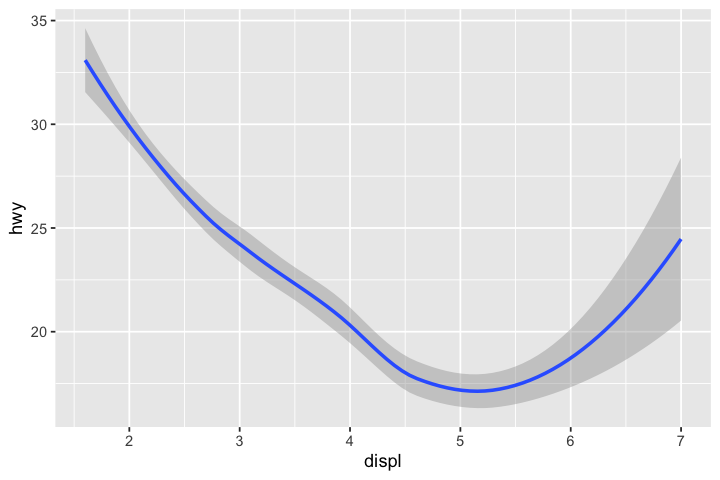

In [126]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

We can also specify that the `linetype` should be `as.factor(cyl)` and see that the data has been separated into three lines based on their drivetrain: 4 (4wd), f (front), r (rear)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



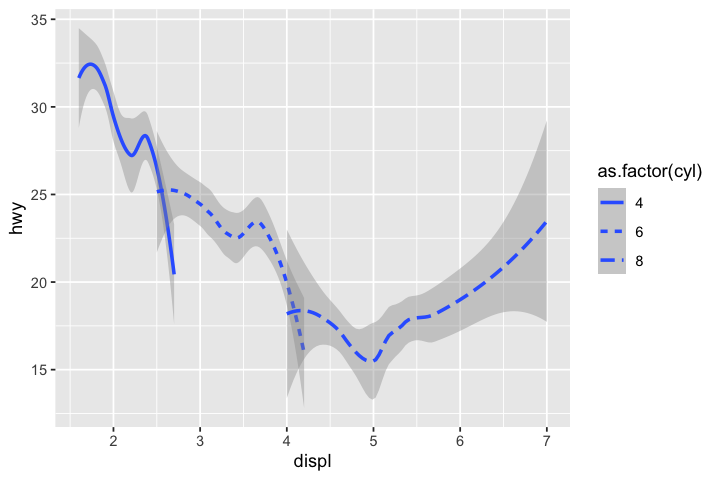

In [127]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = as.factor(cyl)))

Can display multiple geoms on same plot just by adding them -- lets add `geom_smooth` to `geom_point`:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



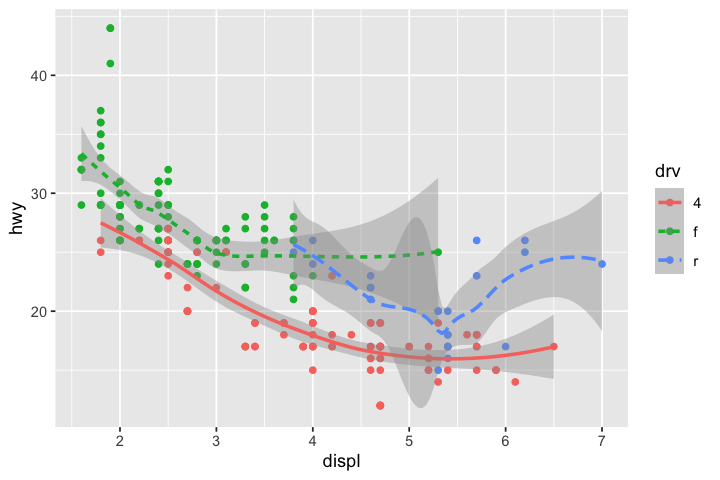

In [128]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=drv)) +
  geom_smooth(mapping = aes(x = displ, y = hwy, color=drv, linetype=drv))

Geoms like `geom_smooth()` use single geometric object to display multiple rows of data. If you don't necessarily want to add other distinguishing features to the geom like color, can use `group` aesthetic (for a categorical variable) to draw multiple objects.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



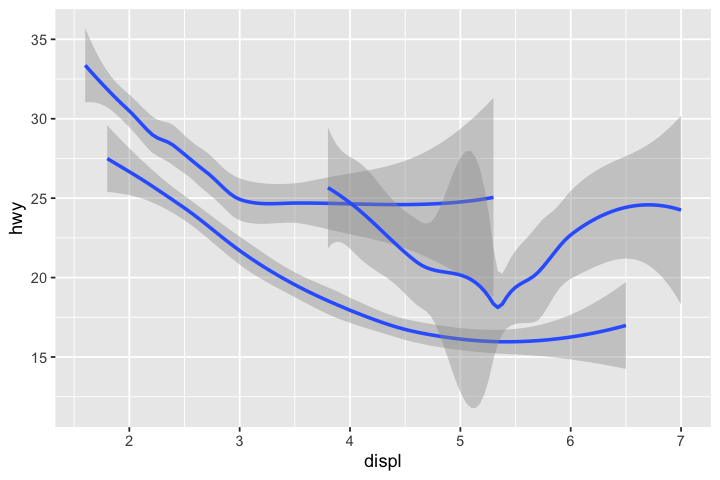

In [129]:
ggplot(data=mpg) +
    geom_smooth(mapping=aes(x=displ,y=hwy,group=drv))

You can use `?geom_smooth` to see a full list of which aesthetics `geom_smooth` will understand.

### Global mappings vs local mappings

`ggplot()` function contains *global* mapping, while each geom has a local mapping

Global mapping of `displ` and `hwy` creates the x and y axes:

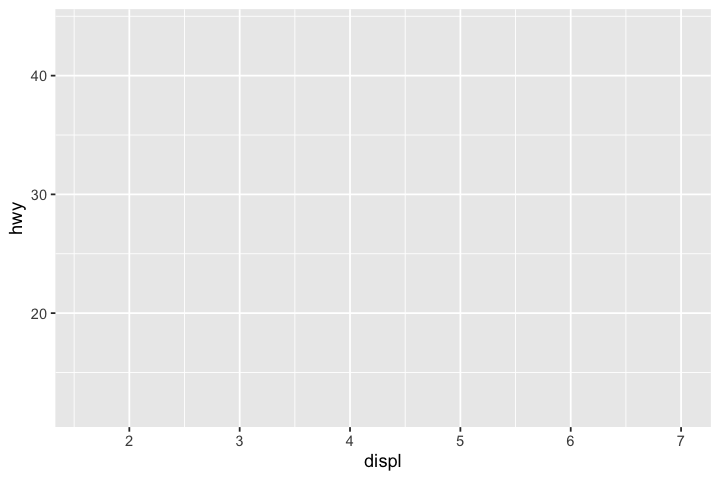

In [130]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy))

Mapping `color` to `class` for point geom while using global x and y mappings:

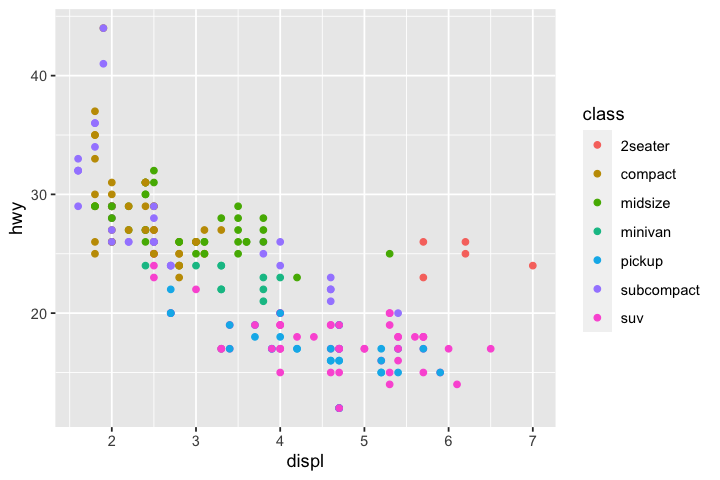

In [131]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) + geom_point(mapping=aes(color=class))

`geom_smooth` doesn't need any mapping arguments if using global mapping:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



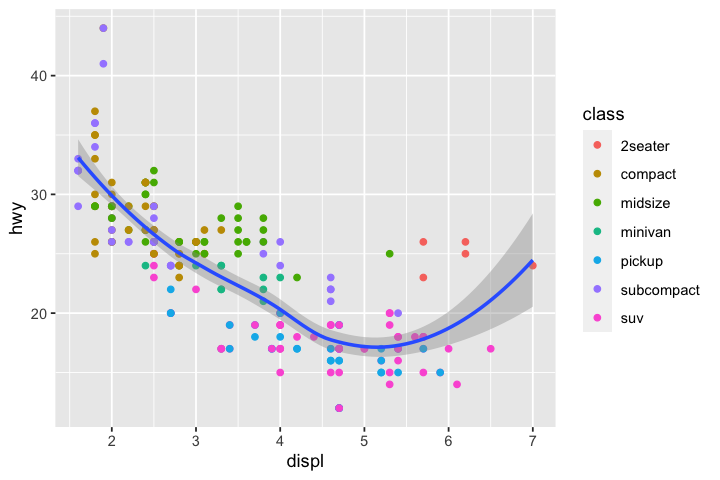

In [132]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point(mapping=aes(color=class))+
    geom_smooth()

The second `geom_smooth` uses same x and y mapping but mapping comes from `no_2seaters` data (from the Tidyverse section of the workshop) instead

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



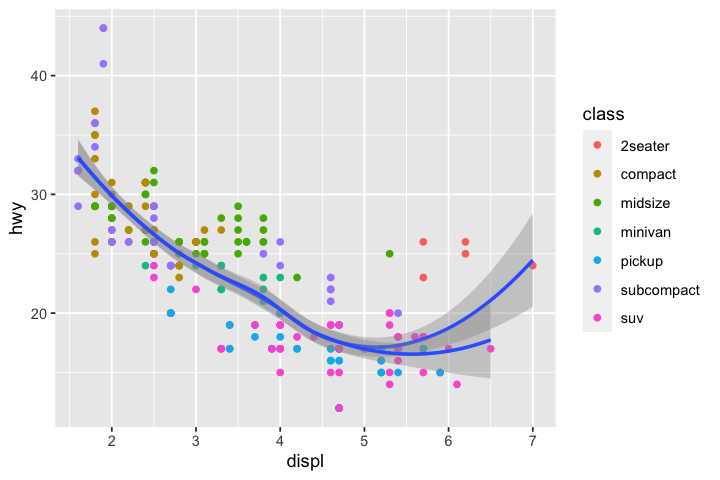

In [133]:
no_2seaters <- filter(mpg, class != "2seater")


ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth() +
  geom_smooth(data = no_2seaters)

## More syntax

    We have gone over the minimum required syntax for ggplot, but there are additonal options that can be specified to further customize your plots, such as <FACET_FUNCTION>:

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

## Facets

Facets can be used to create subplots displaying one subset of data.

 * `facet_wrap()` for a single variable.
 * `facet_grid()` for along 2 variables.

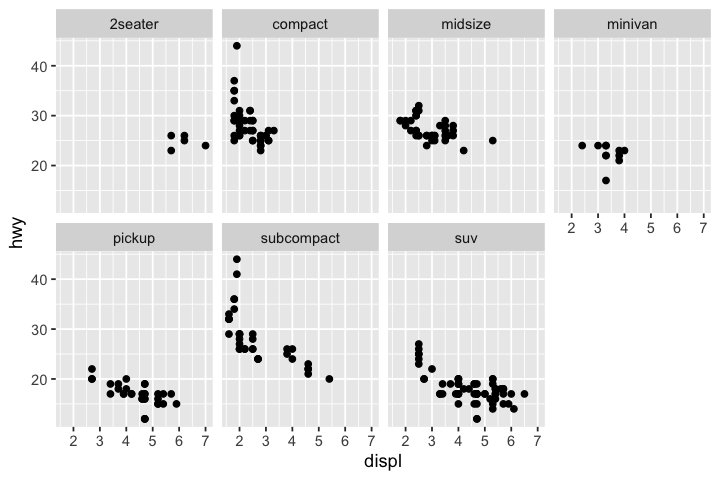

In [134]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=2)

You can use the `nrow` argument to change the arrangement of the subplots:

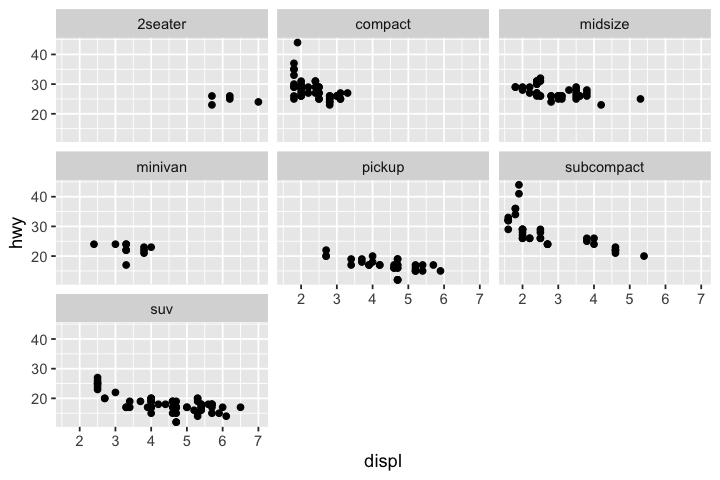

In [135]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=3)

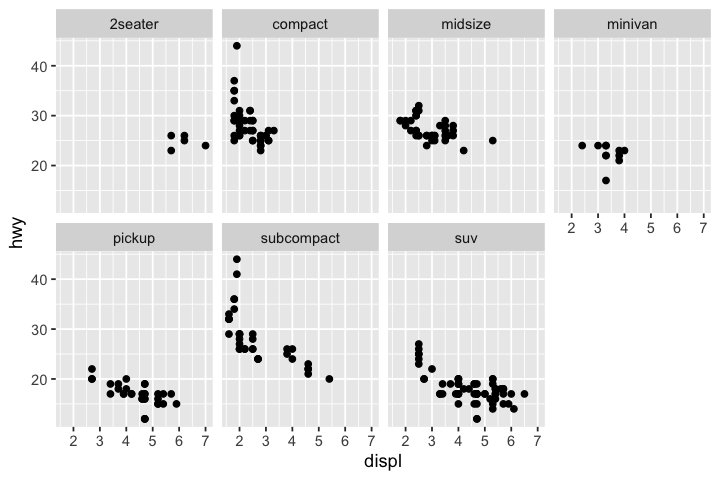

In [136]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, ncol=4)

When using `facet_grid`, some facets might be empty because no observations have those combinations:

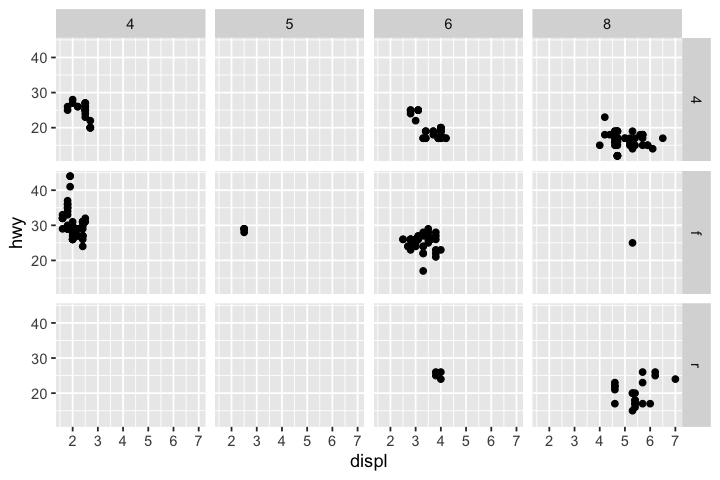

In [137]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

In [138]:
?facet_grid

## Stats

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

The stat argument can be used to specify algorithm used to calculate new values for a graph. Each geom object has a default stat, and each stat has a default geom. Geoms like `geom_point()` will leave data as is, known as `stat_identity()`. Graphs like bar charts and histograms will bin your data and compute bin counts, known as `stat_count()`. Can see full list of stats at [ggplot2 reference](https://ggplot2.tidyverse.org/reference/) under both Layer: geoms and Layer: stats.

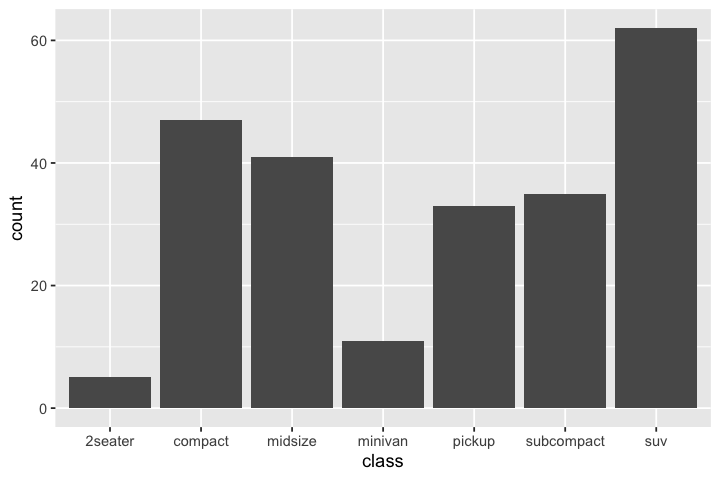

In [139]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class))

Since each stat comes with a default geom, can use stat to create geoms on plots as well.

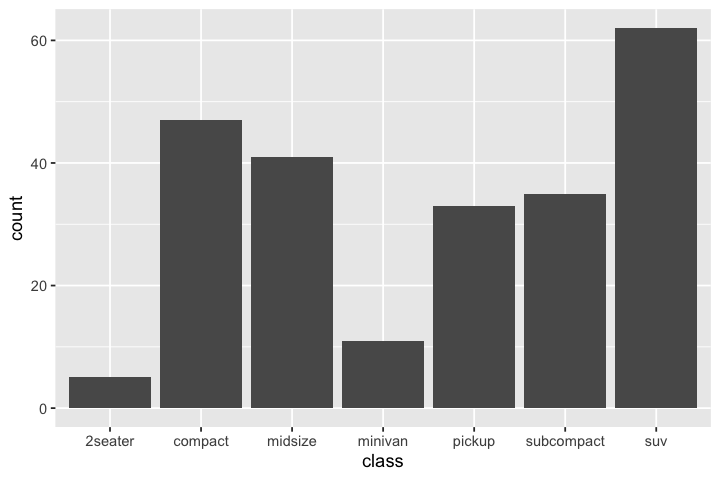

In [140]:
ggplot(data=mpg) +
    stat_count(mapping=aes(x=class))

Because stat_count() computes `count` and `prop`, can use those as variables for mapping as well

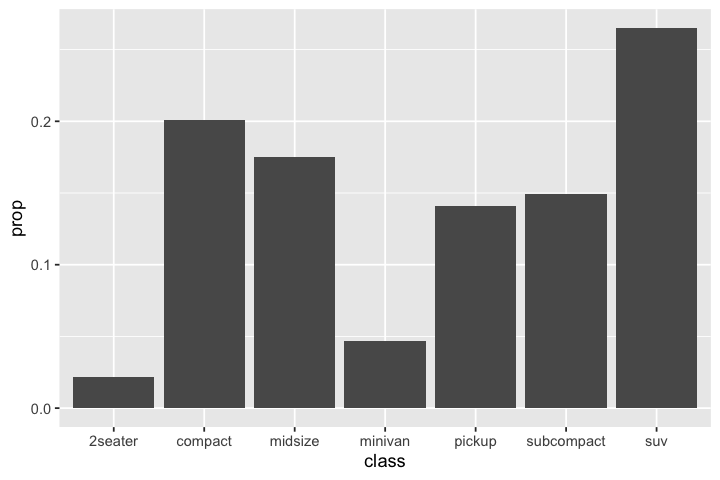

In [141]:
ggplot(data=mpg) + geom_bar(mapping=aes(x=class, y=..prop..,group=1))

`Stat_summary` is associated with geom_point range, the default is to compute mean and standard error

No summary function supplied, defaulting to `mean_se()`



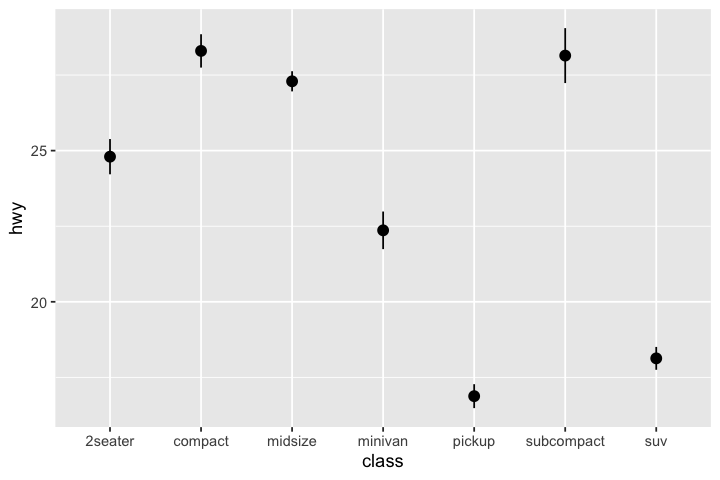

In [142]:
ggplot(data = mpg) + 
  stat_summary(mapping = aes(x=class,y=hwy))

Can change stat_summary to compute median and min/max instead

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


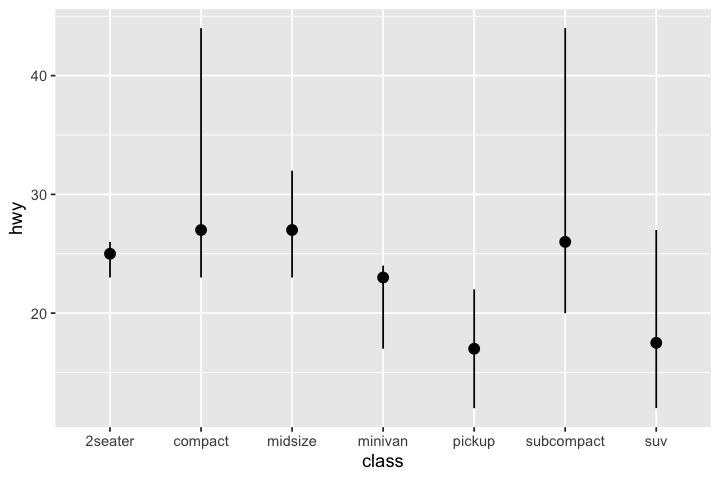

In [143]:
ggplot(data = mpg) +
  stat_summary(
    mapping = aes(x = class, y = hwy),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

## Position adjustments

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Each geom also comes with a default **position adjustment** specified by `position` argument. For geoms like `geom_point()` it is "identity" which is position as is.

Specifically for bar charts, have fill aesthetic. If fill aesthetic gets mapped to another variable, bars are automatically stacked under the "stack" position. Can see [list of positions](https://ggplot2.tidyverse.org/reference/#section-layer-position-adjustment) at ggplot2 reference.

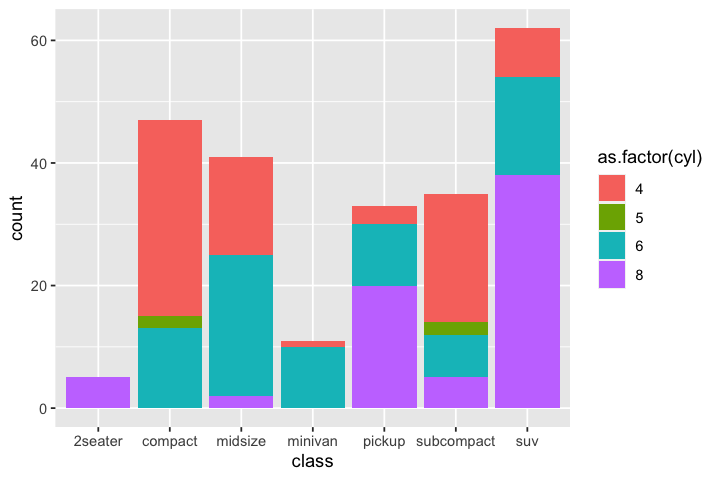

In [144]:
p1 <- ggplot(data = mpg, mapping=aes(x=class,fill=as.factor(cyl)))
p1 + geom_bar()

`position = identity` will place each object exactly where it falls in context of graph, which isn't super useful for bar charts, better for scatterplots.

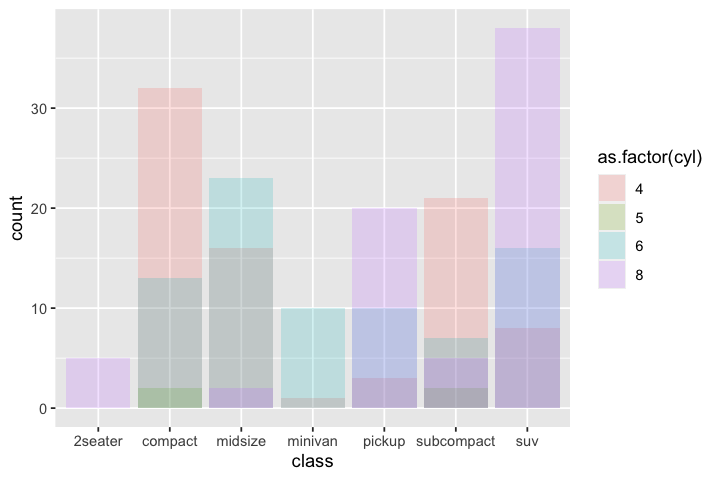

In [145]:
p1 + geom_bar(position="identity", alpha=0.2)

`position = fill` will make bars same height

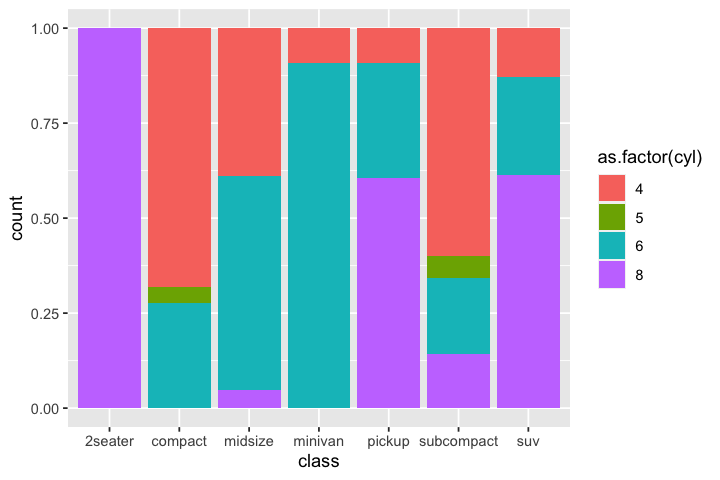

In [146]:
p1 + geom_bar(position="fill")

`position = dodge` places objects directly beside one another, which can make it easier to compare individual values.

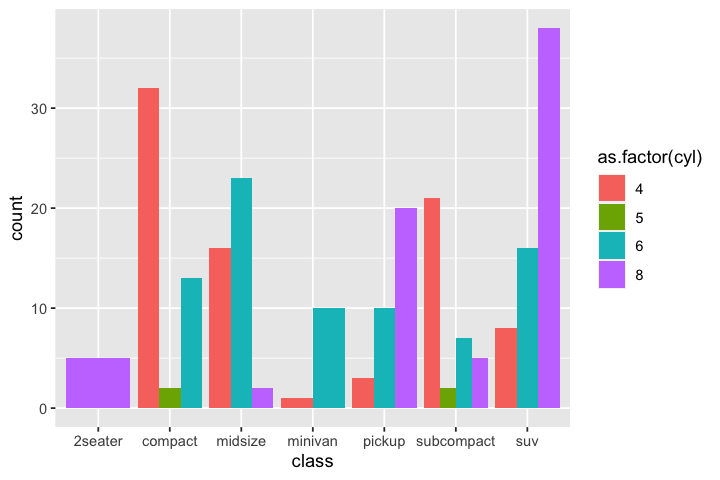

In [147]:
p1 + geom_bar(position="dodge")

For `geom_point` one possible position is "jitter", which will add a small amount of random noise to each point. This spreads points out so that it's unlikely for points to overlap and therefore get plotted over each other. For example it's possible that majority of points are actually one combination of `hwy` and `displ` but they all get plotted at the exact same point so you can't tell. For very large datasets can help prevent overplotting to better see where mass of plot is or trends.

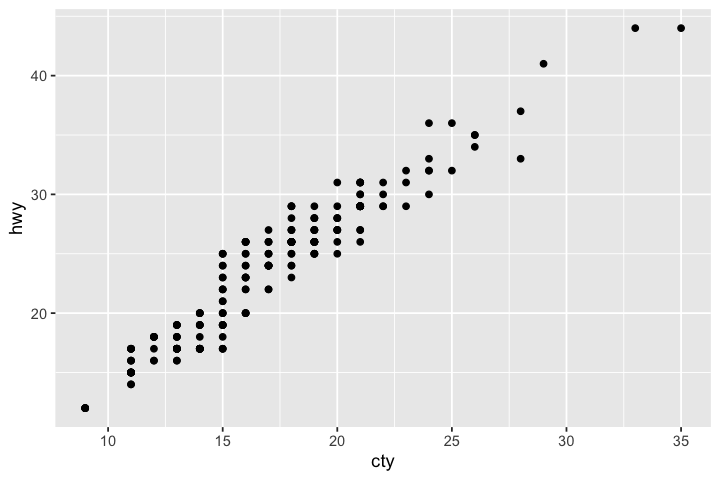

In [148]:

ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

This plot makes the data quite uniform -- maybe there's multiple observations with same value of cty/hwy creating overlapping points. Let's check:

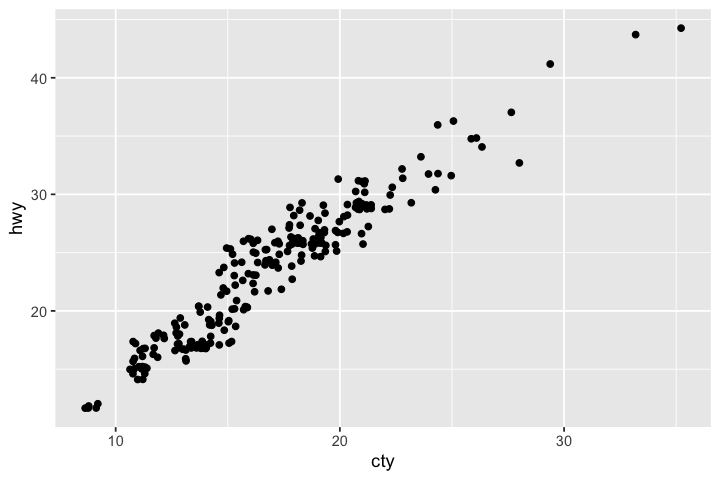

In [149]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point(position="jitter")

`position=jitter` has cleared up the overlapping points for us.

## Coordinate systems

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Default coordinate system is Cartesian.

 * `coord_flip()` switches x and y axes.
 * `coord_quickmap()` sets aspect ratio for maps.
 * `coord_polar()` sets polar coordinates.

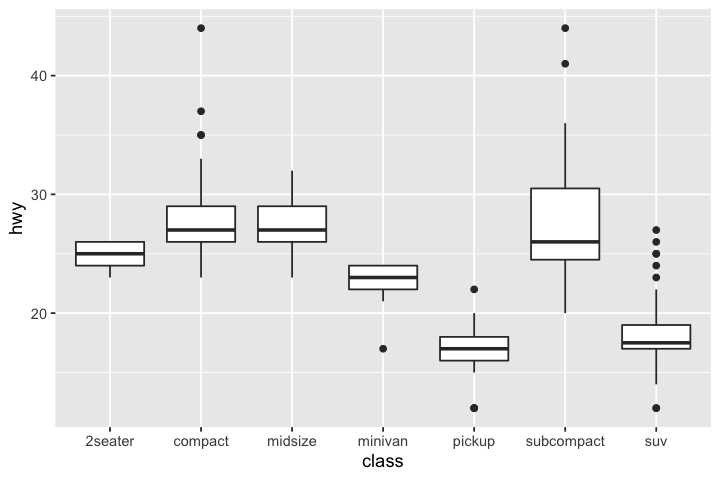

In [150]:
p <- ggplot(data = mpg, mapping = aes(x = class, y = hwy))
p + geom_boxplot()

Can use `coord_flip()` to flip the coordinates:

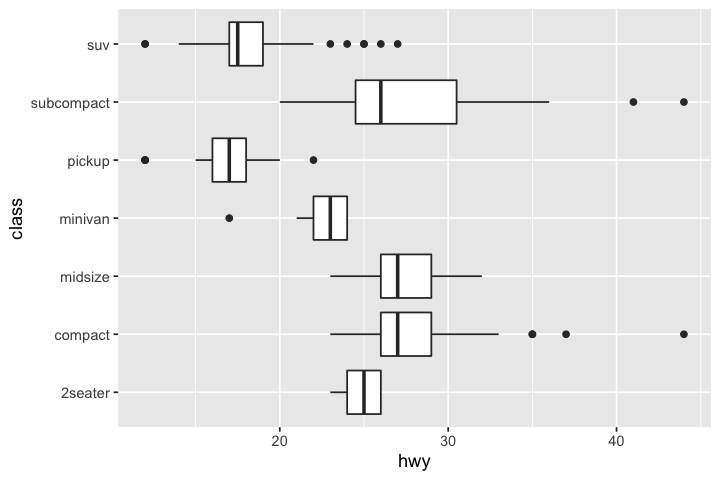

In [151]:
p + geom_boxplot() + coord_flip()

Can also reorder x axis by lowest to highest median hwy mileage, which might allow easier comparisons

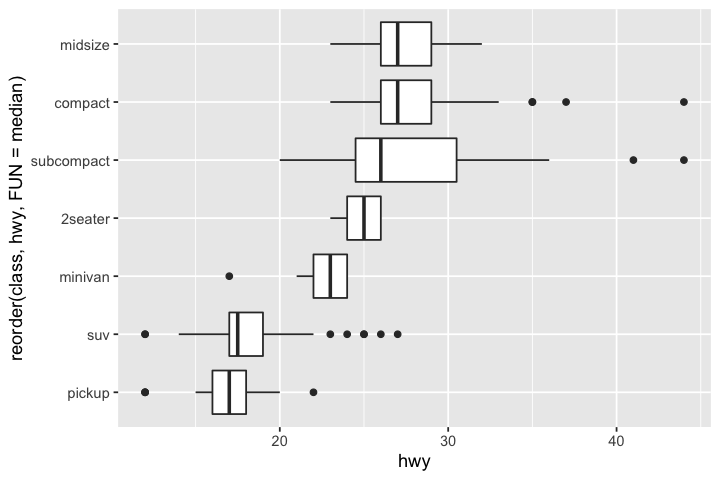

In [152]:
ggplot(data = mpg, mapping = aes(x = reorder(class,hwy,FUN=median), y = hwy)) + 
  geom_boxplot() +
  coord_flip()

You can also use `geom_polygon` to make some maps:

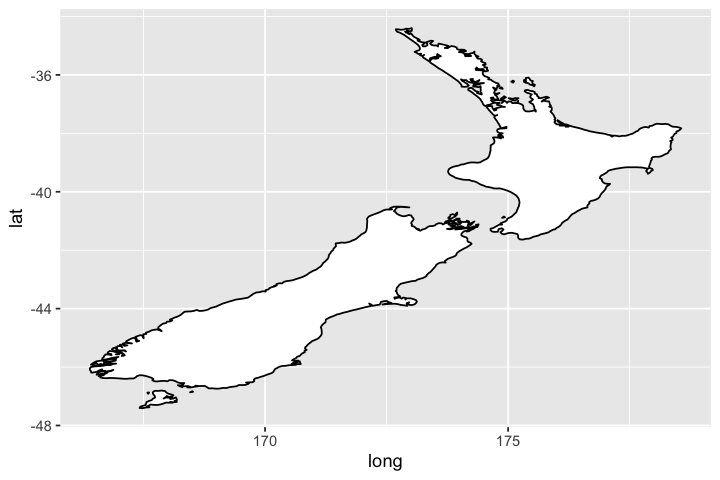

In [153]:
nz <- map_data("nz")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

Can also tweak the aspect ratios:

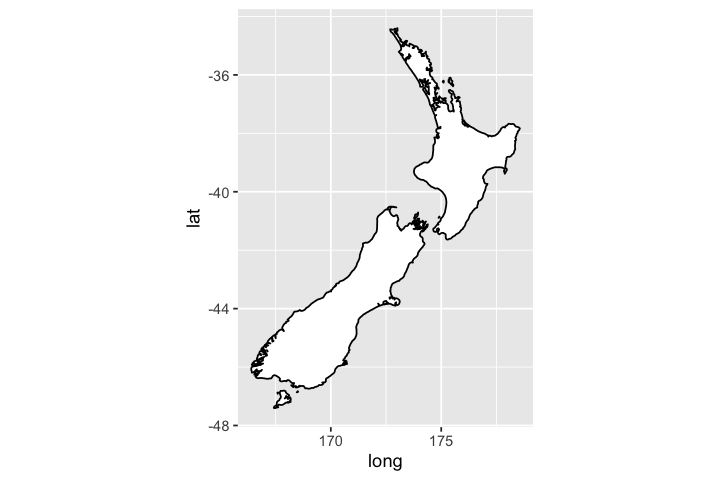

In [154]:
ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()

Can also use polar coordinates

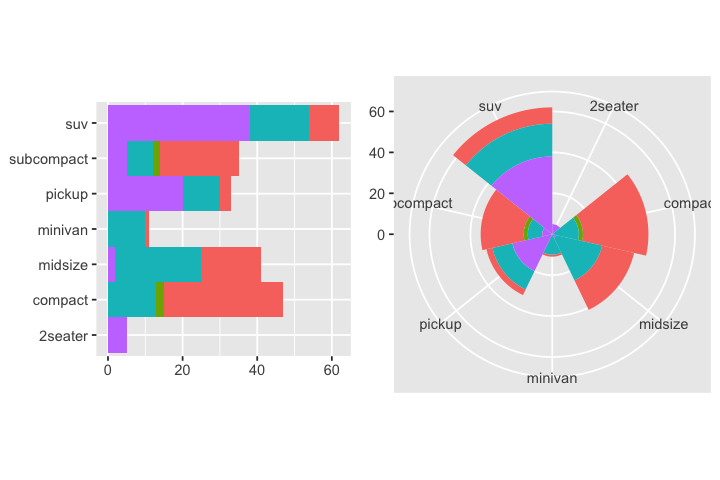

In [155]:
bar <- ggplot(data = mpg) + 
  geom_bar(
    mapping = aes(x = class, fill = as.factor(cyl)), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

p1 <- bar + coord_flip()
p2 <- bar + coord_polar()
grid.arrange(p1,p2, nrow=1)

# Publication Quality Graphs

Last piece with some additional functions to learn...

## Labels

`labs()` to add most kinds of labels: title, subtitle, captions, x-axis, y-axis, legend, etc.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



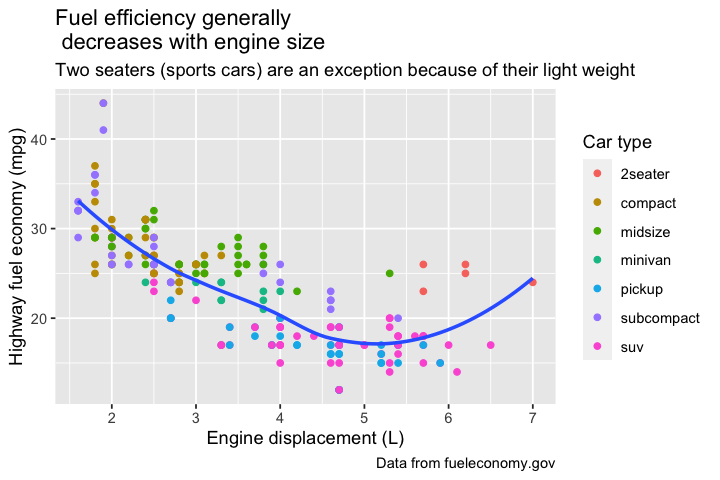

In [156]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally\n decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    color = "Car type"
  )

## Annotations

Can use `geom_text()` to add text labels on the plot.

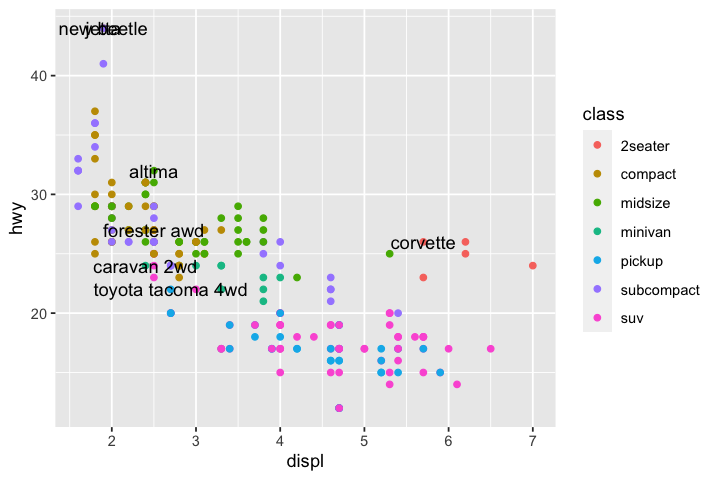

In [157]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

Can also use `ggrepel` to add labels:

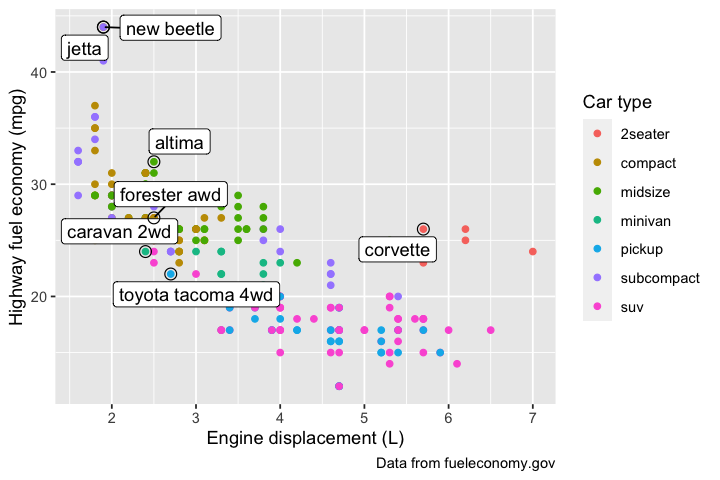

In [158]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class) +
  labs(
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  ) +
  geom_point(size = 3, shape = 1, data = best_in_class)

## Scales

 * `breaks`: For the position of ticks
 * `labels`: For the text label associated with each tick.
 * Default scale is x continuous, y continuous but can also do x logarithmic, y logarithmic, change color scales.

Specify the y-scale breaks:

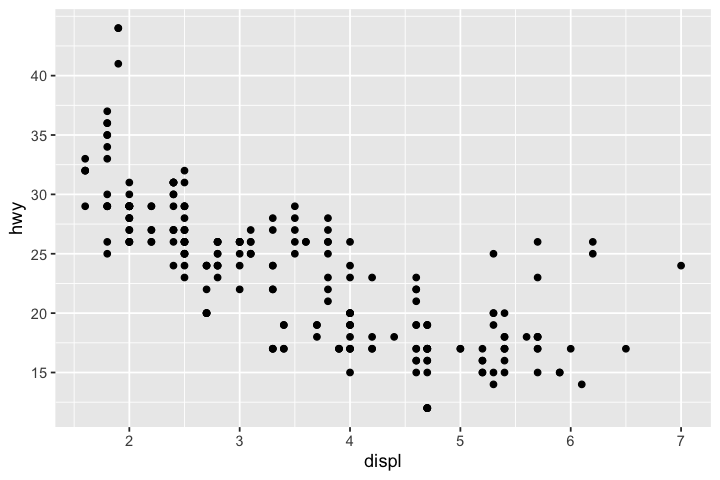

In [159]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

Remove axis tick labels:

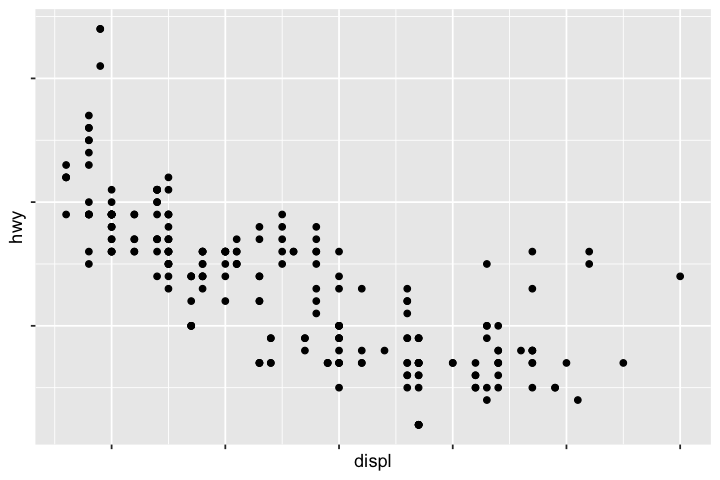

In [160]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

Can also log-scale axes:

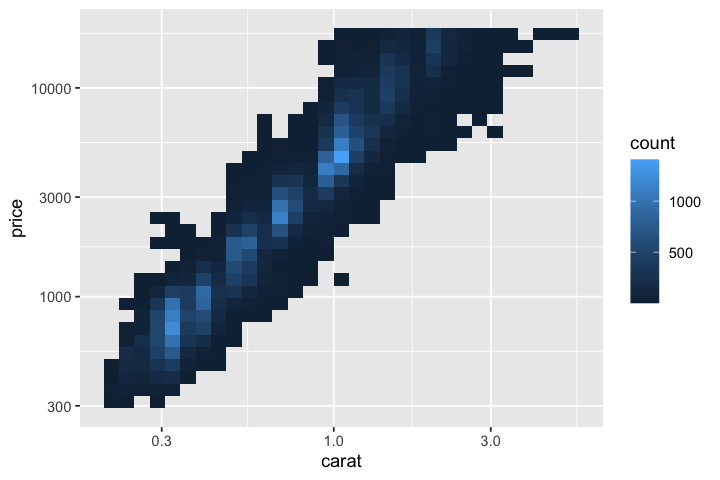

In [161]:
p1 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

Could get the same plot by specifying `log10(carat)` and `log10(price)` in the aesthetics mapping:

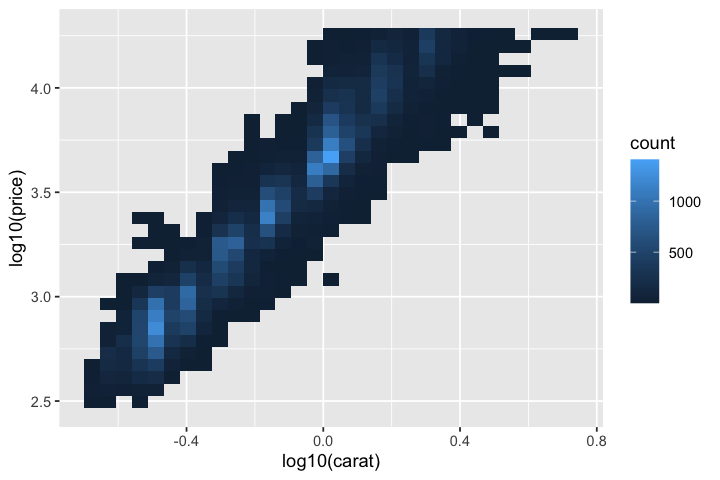

In [162]:
ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

Can also use different ggplot palettes to change the colors -- let's compare the default to the `Set1` palette:

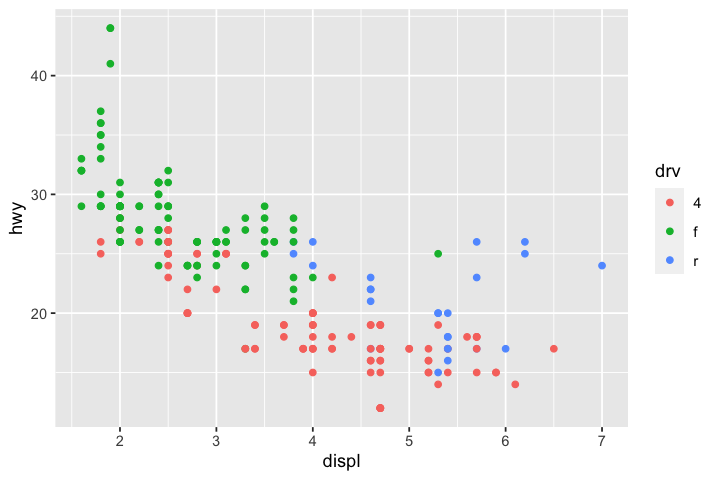

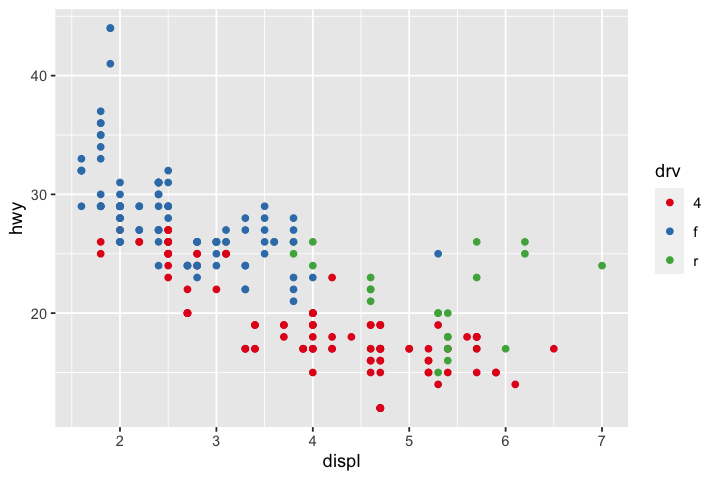

In [163]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

Use `?scale_colour_brewer()` to see a list of palettes.

You can also manually specify which colors to use:

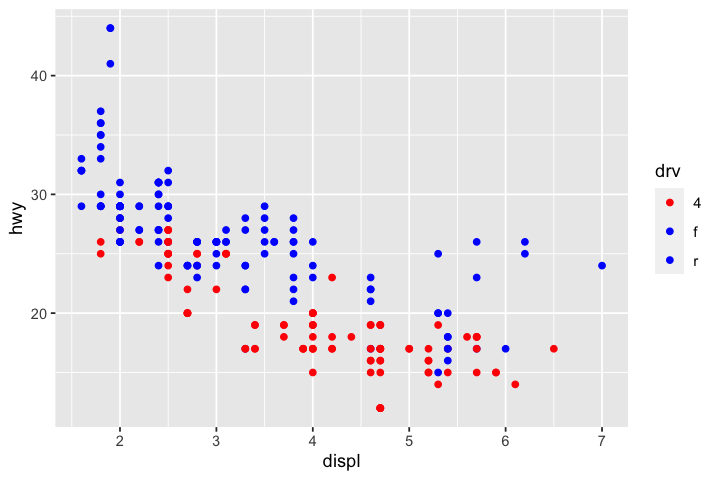

In [164]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_manual(values=c(`4`="red",f="blue",r="blue"))

## Legend positioning

`theme(legend.position)` to control legend position. `guides()` with `guide_legened()` or `guide_colourbar()` for legend display.

In [165]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

p_left <- base + theme(legend.position = "left")
p_top <- base + theme(legend.position = "top")
p_bottom <- base + theme(legend.position = "bottom")
p_right <- base + theme(legend.position = "right")


Let's use `grid.arrange` to look at our plots:

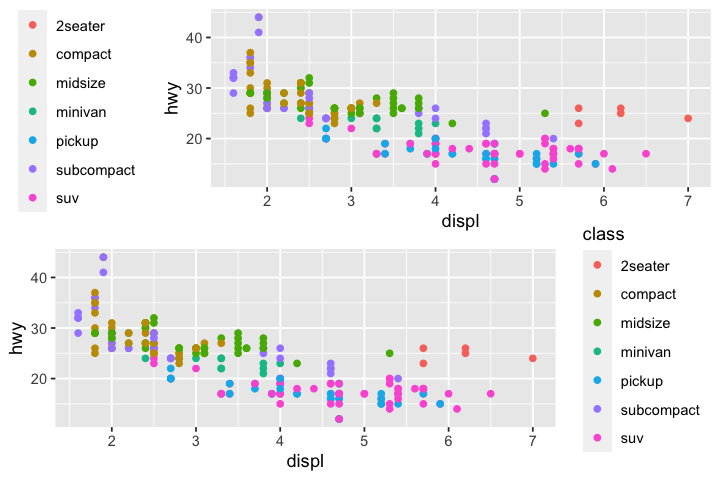

In [166]:
grid.arrange(p_left, p_right, nrow = 2)

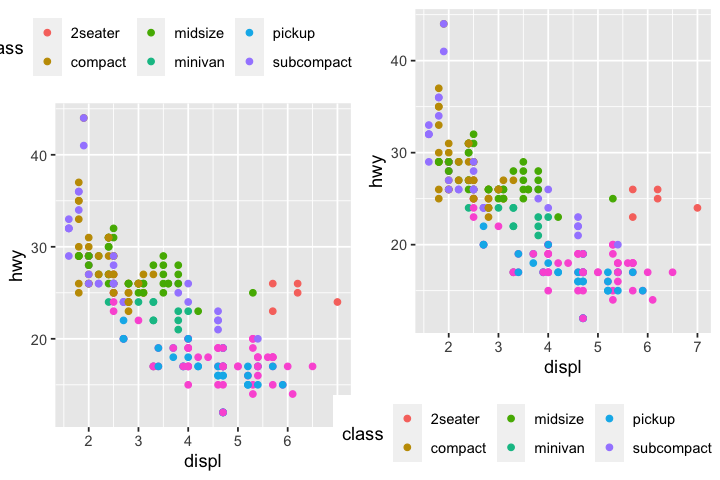

In [167]:
grid.arrange(p_top, p_bottom, nrow = 1)

Let's pull a few of these pieces together to start making out publication quality visualization:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



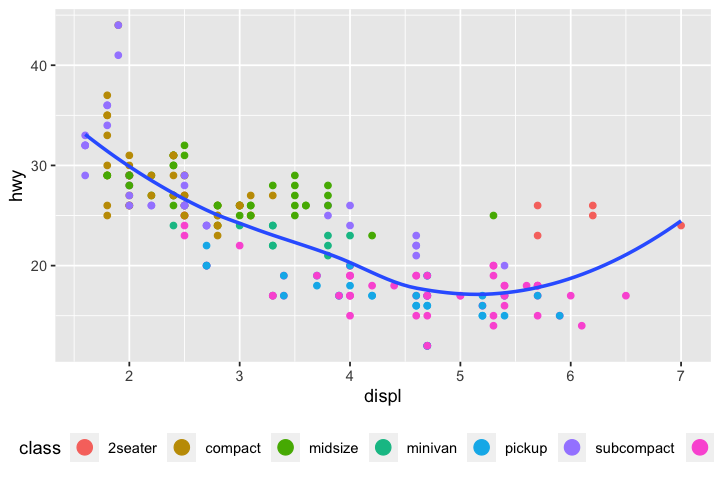

In [168]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))

## Zooming

Three ways to control plot limits:
 * Adjusting what data are plotted
 * Setting limits in each scale
 * Setting `xlim` and `ylim` in `coord_cartesian()`

Can set `xlim` and `ylim` in `coord_cartesian`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



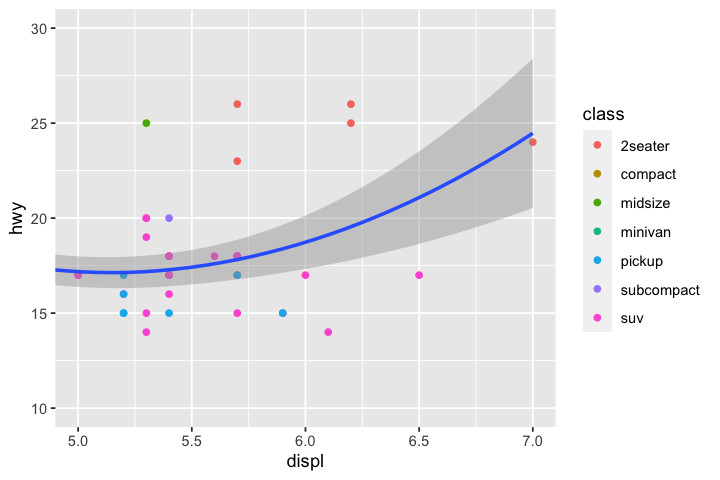

In [169]:
ggplot(mpg, mapping = aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth() +
  coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

Can adjust what data are plotted, but note that `geom_smooth` will plot its regression over the subsetted data. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



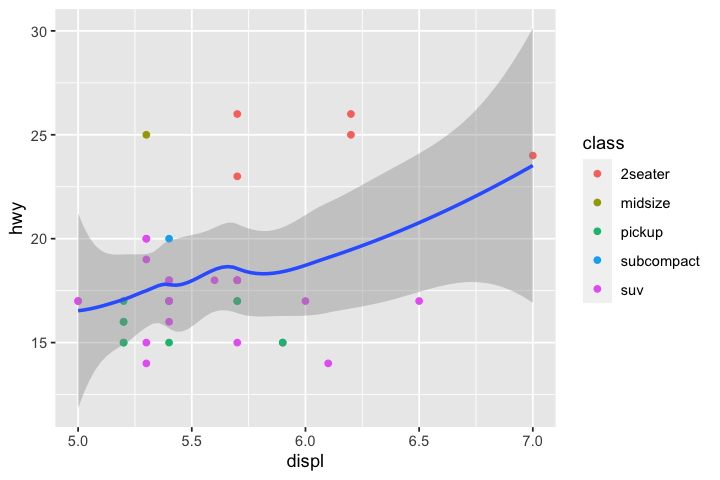

In [170]:
filter(mpg, displ >= 5, displ <= 7, hwy >= 10, hwy <= 30) %>%
  ggplot(aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth()

You can also have different scales along `hwy` and `displ` if you subet the data

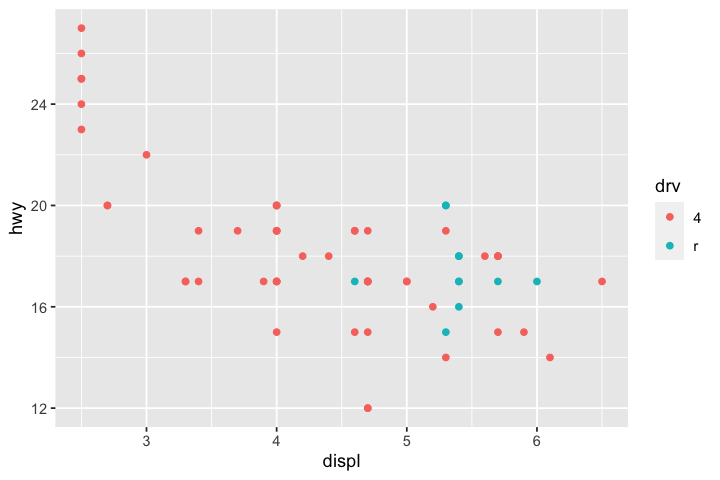

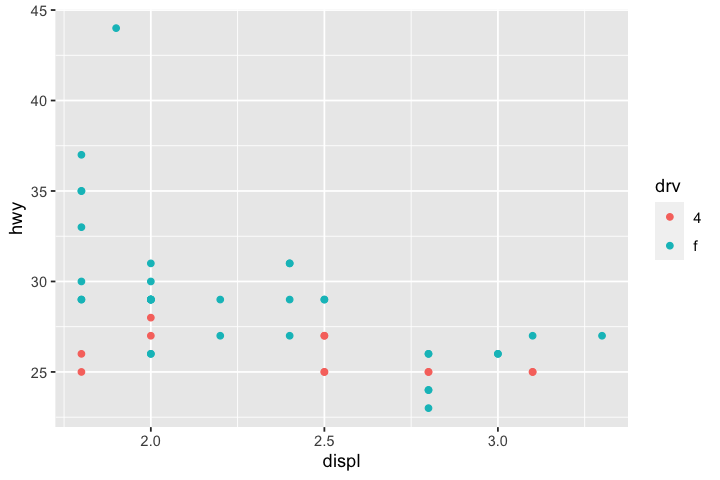

In [171]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")
ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point()

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point()

Note that the first plot is showing 4 and r for `drv`, while the second is showing 4 and f for `drv`.

Can set limits in each scale

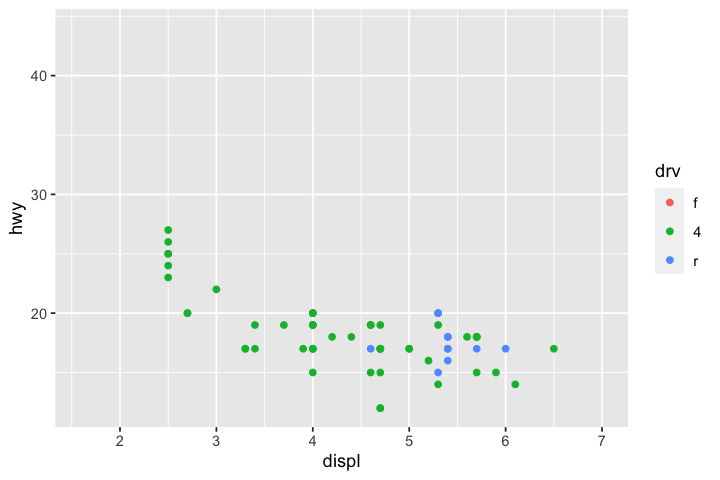

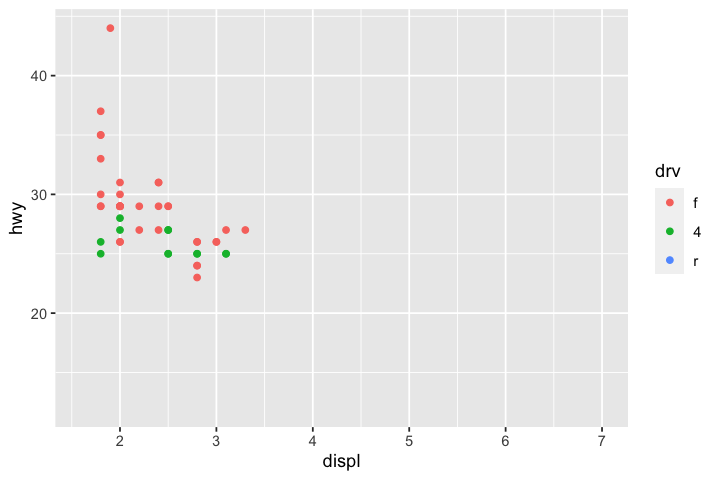

In [172]:
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

## Themes

**ggplot2** has 8 themes by default, can get more in other packages like **ggthemes**. Generally prefer `theme_classic()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



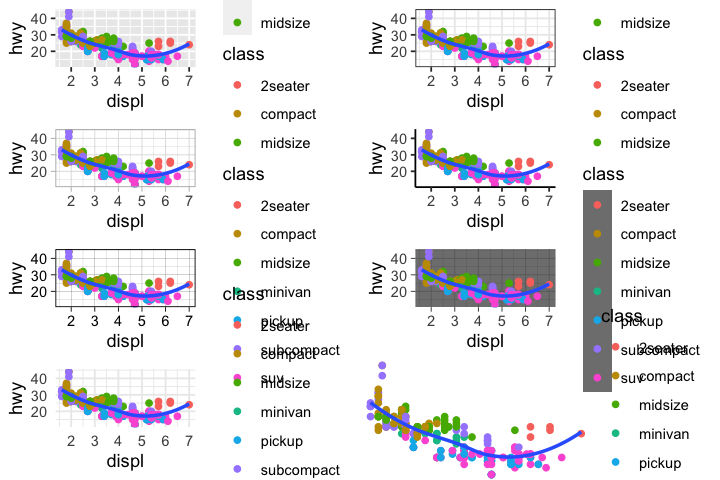

In [173]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE)

p1 <- base + theme_bw()
p2 <- base + theme_light()
p3 <- base + theme_classic()
p4 <- base + theme_linedraw()
p5 <- base + theme_dark()
p6 <- base + theme_minimal()
p7 <- base + theme_void()

grid.arrange(base,p1,p2,p3,p4,p5,p6,p7,nrow=4)

## Saving your plots

 * `ggsave()` will save most recent plot to disk (can also specify which plot to save if you save the plot as an object first).
 * `tiff()` will save next plot to disk
 * Other functions like `postscript()` for eps files, etc.
 * All can take `width`, `height`, `fonts`, `pointsize`, `res` (resolution) arguments

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Saving 7 x 7 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



pdf 
  2

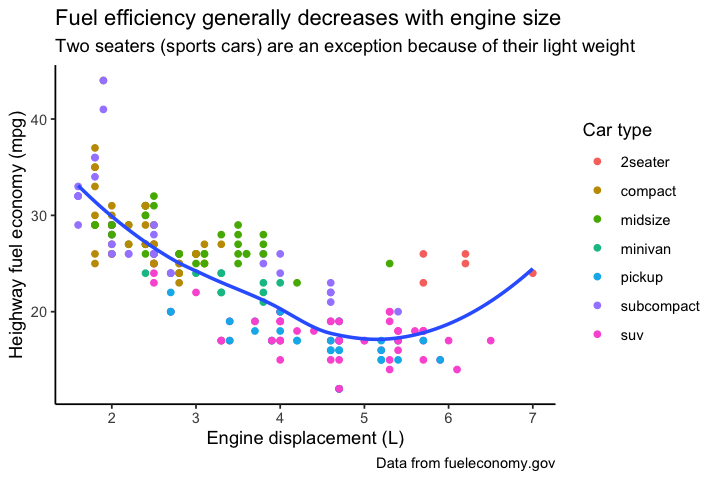

In [174]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + x_scale + y_scale + theme_classic()
p1
ggsave("my_plot.pdf")

tiff("my_plot.tiff",width=7,height=5,units="in",pointsize=8,res=350)
p1
dev.off()

# Some other useful visualization packages

We don't have time in this workshop to get in depth to other workshops, but here are some more useful visualization packages that may be helpful for your research.

## ggtree for phylogenetics

Resources and associated packages:
 * [Data Integration, Manipulation and Visualization of Phylogenetic Trees](https://yulab-smu.github.io/treedata-book/index.html)
 * [treeio](https://bioconductor.org/packages/release/bioc/html/treeio.html)
 * [tidytree](https://cran.r-project.org/web/packages/tidytree/index.html)
 
## cowplot

Meant to provide publication-ready theme for **gplot2** that requires minimum amount of fiddling with sizes of axis labels, plot backgrounds, etc. Auto-sets `theme_classic()` for all plots.

## Gviz for plotting data along genomic coordinates

Can be installed from [Bioconductor](https://bioconductor.org/packages/release/bioc/html/Gviz.html).

## phyloseq for metagenomics

Website is [very comprehensive](http://joey711.github.io/phyloseq/).

# Summary

Now that we've gone through tidying, transforming, and visualizing data let's review all of the different functions we've used and in some cases learned the inner workings of:

## Tidying

 * `gather()`
 * `spread()`
 * `separate()`
 * `unite()`
 * `%>%` propagates the output from a function as input to another. eg: x %>% f(y) becomes f(x,y), and x %>% f(y) %>% g(z) becomes g(f(x,y),z).
 
## Transforming

 * `filter()` to pick observations (rows) by their values
 * `arrange()` to reorder rows, default is by ascending value
 * `select()` to pick variables (columns) by their names
 * `mutate()` to create new variables with functions of existing variables
 * `summarise()` to collapes many values down to a single summary
 * `group_by()` to set up functions to operate on groups rather than the whole data set
 
## Visualizing

 * `ggplot` - global data and mappings
 * `geom_point` - geom for scatterplots
 * `geom_smooth` - geom for regressions
 * `geom_pointrange` - geom for vertical intervals defined by `x`, `y`, `ymin`, and `ymax`
 * `geom_bar` - geom for barcharts
 * `geom_boxplot` - geom for boxplots
 * `geom_polygon` - geom for polygons
 * `aes(color)` - color mapping
 * `aes(shape)` - shape mapping
 * `aes(size)` - size mapping
 * `aes(alpha)` - transparency mapping
 * `as.factor()` - transforming numerical values to categorical values with levels
 * `facet_grid`
 * `facet_wrap`
 * `stat_count` - default stat for barcharts, bins by x and counts
 * `stat_identity` - default stat for scatterplots, leaves data as is
 * `stat_summary` - default stat for pointrange, by default computes mean and se of y by x
 * `position="identity"`
 * `position="stacked"`
 * `position="fill"`
 * `position="dodge"`
 * `position="jitter"`
 * `coord_flip`
 * `coord_map`
 * `coord_polar`

In [175]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS/LAPACK: /opt/miniconda3/envs/r_4_env/lib/libopenblasp-r0.3.10.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] maps_3.3.0      ggrepel_0.9.0   gridExtra_2.3   forcats_0.5.1  
 [5] stringr_1.4.0   dplyr_1.0.4     purrr_0.3.4     readr_1.4.0    
 [9] tidyr_1.1.2     tibble_3.0.4    ggplot2_3.3.3   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5         lattice_0.20-41    lubridate_1.7.9.2  ps_1.5.0          
 [5] assertthat_0.2.1   digest_0.6.27      utf8_1.1.4         IRdisplay_0.7.0   
 [9] R6_2.5.0           cellranger_1.1.0   repr_1.1.0         backports_1.2.1   
[13] reprex_2.0.0       evaluate_0.14      httr_1.4.2         pillar_1.6.0      
[17] rlang_0.4.10